# Investigating a dataset - No Show Appointments

### Blueprint of the dataset

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
 - ‘ScheduledDay’ tells us on what day the patient set up their appointment.
 - ‘Neighborhood’ indicates the location of the hospital.
 - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
 - ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

##### Introduction:
Question
 - What is the total number of people that 'showed up' and the total that 'didnot show up' 
 - Which of one these features( 'Age', 'Gender', 'SMS_Received') made some people show up for the appointment the most

In [1]:
# lets import some important libraries to investigate our dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


### Data Wrangling 
 - Here i go through the data to check how clean it is and check for errors 
 - Then after i trim and clean it if any errors are found 
 - But first i will load the dataset

In [2]:
#lets load our dataset
N_S_appoint = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
#Here we check the head of the dataset to check our columns and values if they are well written
N_S_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Here we check the tail of our dataset to see how the bottow looks like and spot some errors if there is any
N_S_appoint.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#checking the information in our dataset
N_S_appoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Then we check for duplicates and null values 
N_S_appoint.duplicated().sum()

0

In [7]:
N_S_appoint.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#Here we should check for shape and the summary of the dataset too
print(N_S_appoint.shape)
print(N_S_appoint.describe())

(110527, 14)
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.

### Data Cleaning
#### From the wrangling we did it was obvious that the dataset need to be cleaned 
 - The columns('Hipertension', 'Handcap', 'No-show') were misspell
 - Then the datatype for these columns('AppointmentDay','ScheduledDay') are wrong which should be changed to datetime datatype
 - if we look through the summary we got above the column('Age') has the minimum age as -1 which cannot be to have as age so we to drop them 
 - Dropping unwanted columns

## 1. Renaming Columns

In [9]:
# Creating a Function to rename columns
def rename_columns(columns):
    return N_S_appoint.rename(columns=columns, inplace=True)

In [10]:
# Calling the above function to rename 'Hipertension','Handcap', 'No-show'  to  'Hypertension','Handicap', 'No_show'
to_be_renamed = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show': 'No_show'}
rename_columns(to_be_renamed)
N_S_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 2. Changing Datatypes

In [11]:
#converting the columns to datatime datatype
N_S_appoint['ScheduledDay'] = pd.to_datetime(N_S_appoint['ScheduledDay'])
N_S_appoint['AppointmentDay'] = pd.to_datetime(N_S_appoint['AppointmentDay'])

In [12]:
N_S_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 3.Removing ages less and equal to 0

In [13]:
#Dropping the ages less and equal to 0
d_a = N_S_appoint.query('Age <= 0')
N_S_appoint.drop(d_a.index, inplace = True)
N_S_appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## 4. Dropping Unwanted columns

In [14]:
#Creating a function to drop unwanted columns
def remove_columns(columns):
    return N_S_appoint.drop(columns = columns, inplace = True, axis = 1)

In [15]:
#Calling the function above to remove unwanted columns ['PatientId', 'AppointmentID']
to_be_removed = ['PatientId', 'AppointmentID']
remove_columns(to_be_removed)
N_S_appoint.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#Grouping the dataset by the mean of No_show column     
N_S_appoint.groupby('No_show').mean()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
No_show,,,,,,,
No,39.075187,0.096569,0.211343,0.076348,0.031451,0.023503,0.293258
Yes,35.329151,0.118589,0.173985,0.065959,0.031227,0.020895,0.441328


## Exploratory Data analysis
 - What is the total number of people that 'showed up' and the total that 'didnot show up'

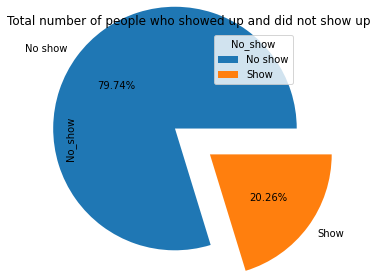

In [17]:
#Total number of people who showed and did not show
my_labels = ['No show', 'Show']
my_explode = [0.2, 0.3]
N_S_appoint["No_show"].value_counts().plot(kind = "pie", labels = my_labels, explode = my_explode, autopct = "%0.2f%%",radius = 1.4);
plt.legend(title = 'No_show');
plt.title('Total number of people who showed up and did not show up');
plt.show()

### Question 2
 - Which of one these features( 'Age', 'Scholarship', 'SMS_Received') made some people show up for the appointment the most

In [18]:
# creating a new column which shows the age range by using the cut function 
bin_edges = [1 , 17, 30, 55, 115 ]
bin_names =['Child', 'Youth', 'Adult', 'Old_age']
N_S_appoint['Age_range'] = pd.cut(N_S_appoint['Age'], bin_edges, labels = bin_names)
N_S_appoint.head() # to check if our code worked

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_range
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old_age
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Old_age
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old_age
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Old_age


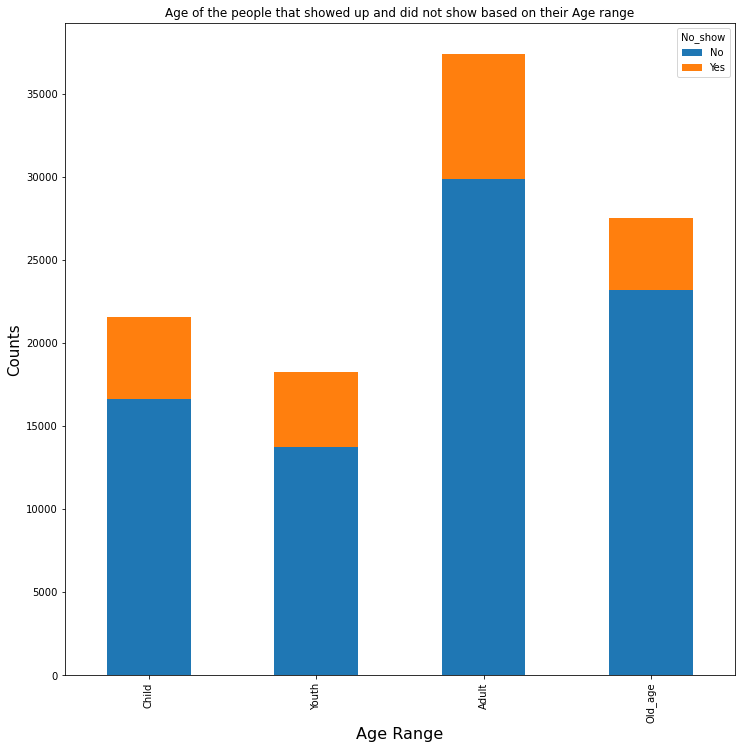

In [19]:
# A bar chart showing the total people that showed up based on their age range
N_S_appoint.groupby(['Age_range', 'No_show']).count()['Age'].unstack().plot(kind = 'bar', figsize = (12, 12), stacked= True);
plt.title('Age of the people that showed up and did not show based on their Age range');
plt.xlabel('Age Range',  size = 16)
plt.ylabel('Counts', size = 15)
plt.show()

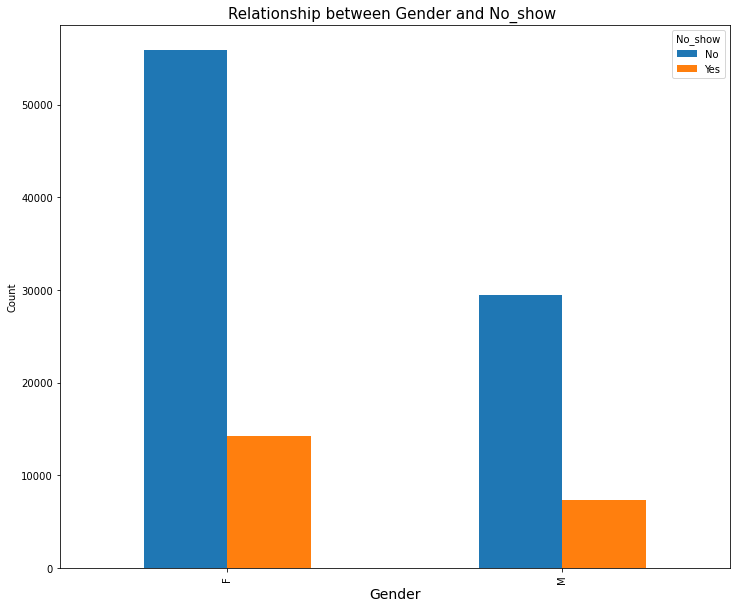

In [20]:
#checking if Gender was a factor that affected the number of no show
N_S_appoint.groupby(['Gender', 'No_show']).count()['Age'].unstack().plot(kind = 'bar', stacked =False, figsize = (12,10));
plt.title('Relationship between Gender and No_show ', size = 15)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count')
plt.show()

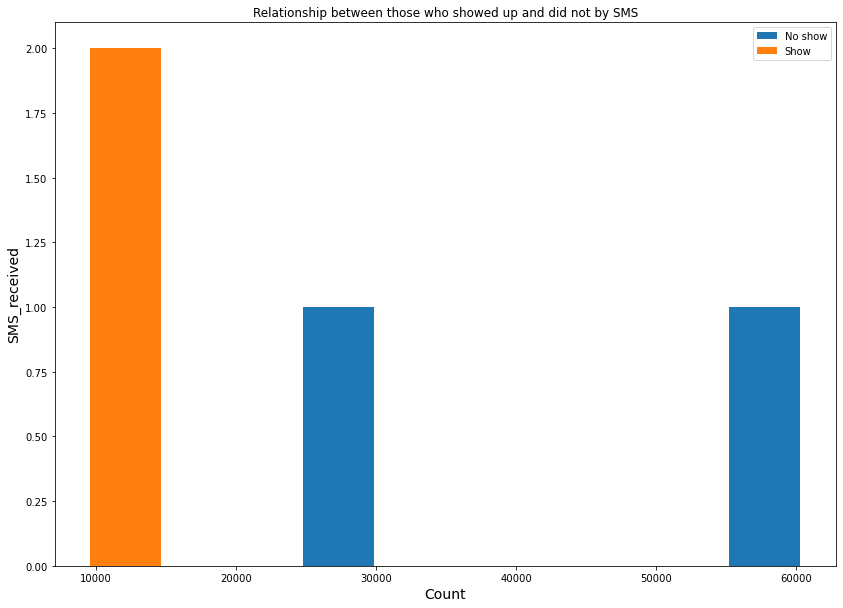

In [21]:
#visualising based on SMS received to know who showed and did not 
N_S_appoint.groupby(['SMS_received', 'No_show']).count()['Age'].unstack().plot( kind = 'hist', stacked = False, figsize =(14,10));
plt.title('Relationship between those who showed up and did not by SMS', size = 12)
plt.xlabel('Count', size = 14)
plt.ylabel('SMS_received', size = 14)
plt.legend(['No show', 'Show'])
plt.show()


### Conclusion
 - From the analysis of the data we have done, it is obvious that people who did not show up at their appointment time are more the people who showed up
 - Age played a very big part in this analysis why? Because looking at the mean age of people that showed up and did not should up it is obvious that older people find difficult to go for the appointment but people younger made themselves available 
 - When we looked at those who did not show based on gender it is obvious from our exploratory data analysis that the female tend not to show up the most for the appointment 
 - We can also see that those who got an SMS have a little bit of number for not showing up, but looking at those who did not get the SMS are so much more and had high numbers of no shows .
 
### Limitations
 - Having ages between -1 and 0 which should not be in a dataset because that is not possible 
 - The result of this analysis cannot be used as a general measure because the data are only gathered from some hospital in Brazil.Thus, reasons may differ from country to country

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'First Project ( No_Show Appointments).ipynb'])

1